
Importing Necessary Libraries



In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [41]:
#reading dataset
td=pd.read_csv(r"/content/titanic.csv")

In [42]:
td.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [43]:
td[['Last Name', 'First Name']] = td['name'].str.extract('(\w+)\s(\w+)', expand=True)


In [44]:
td

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Last Name,First Name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Elisabeth,Walton
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Hudson,Trevor
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Helen,Loraine
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Hudson,Joshua
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Hudson,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,NaN,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,NaN,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,NaN,NaN


In [45]:
td.drop(["name","cabin","boat","body","home.dest"],axis=1,inplace=True)


In [46]:
td

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,Last Name,First Name
0,1,1,female,29.00,0,0,24160,211.3375,S,Elisabeth,Walton
1,1,1,male,0.92,1,2,113781,151.5500,S,Hudson,Trevor
2,1,0,female,2.00,1,2,113781,151.5500,S,Helen,Loraine
3,1,0,male,30.00,1,2,113781,151.5500,S,Hudson,Joshua
4,1,0,female,25.00,1,2,113781,151.5500,S,Hudson,J
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.50,1,0,2665,14.4542,C,NaN,NaN
1305,3,0,female,NaN,1,0,2665,14.4542,C,NaN,NaN
1306,3,0,male,26.50,0,0,2656,7.2250,C,NaN,NaN
1307,3,0,male,27.00,0,0,2670,7.2250,C,NaN,NaN


In [47]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   sex         1309 non-null   object 
 3   age         1046 non-null   float64
 4   sibsp       1309 non-null   int64  
 5   parch       1309 non-null   int64  
 6   ticket      1309 non-null   object 
 7   fare        1308 non-null   float64
 8   embarked    1307 non-null   object 
 9   Last Name   823 non-null    object 
 10  First Name  823 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [48]:
td.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [49]:
td.isnull().sum()

pclass          0
survived        0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
embarked        2
Last Name     486
First Name    486
dtype: int64

In [50]:
td.dropna(subset=["age","Last Name","First Name","embarked"],inplace=True)


Data Visualization

In [51]:
from warnings import filterwarnings
filterwarnings(action='ignore')
td.corr()

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.292206,-0.446465,0.095415,0.074323,-0.543136
survived,-0.292206,1.000000,-0.046218,-0.025346,0.086519,0.224211
age,-0.446465,-0.046218,1.000000,-0.256575,-0.149624,0.181913
sibsp,0.095415,-0.025346,-0.256575,1.000000,0.342780,0.146491
parch,0.074323,0.086519,-0.149624,0.342780,1.000000,0.223775
fare,-0.543136,0.224211,0.181913,0.146491,0.223775,1.000000


Heat Map


<Axes: >

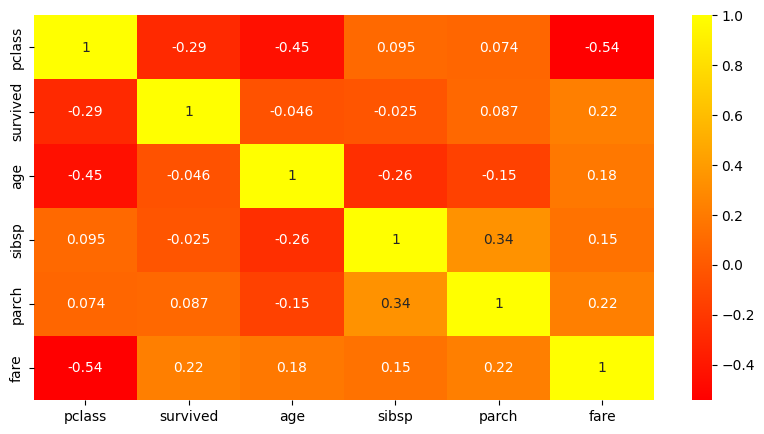

In [52]:
plt.figure(figsize=(10,5))
print("Heat Map")
sns.heatmap(td.corr(),cmap='autumn',annot=True)

In [53]:
male = len(td[td['sex'] == 'male'])
print("Total Males in Titanic: ",male)

Total Males in Titanic:  430


In [54]:
female = len(td[td['sex'] == 'female'])
print("Total Females in Titanic: ",female)

Total Females in Titanic:  287


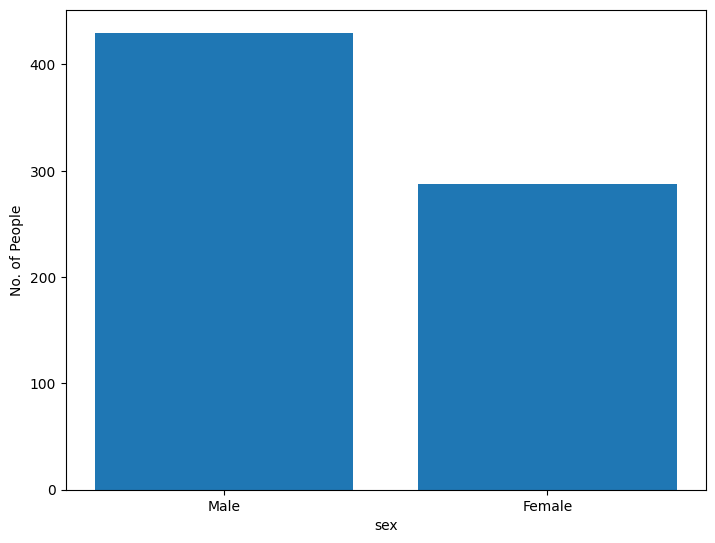

In [55]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sex = ['Male','Female']
data = [430,288]
plt.ylabel("No. of People")
plt.xlabel("sex")
ax.bar(sex,data)
plt.show()

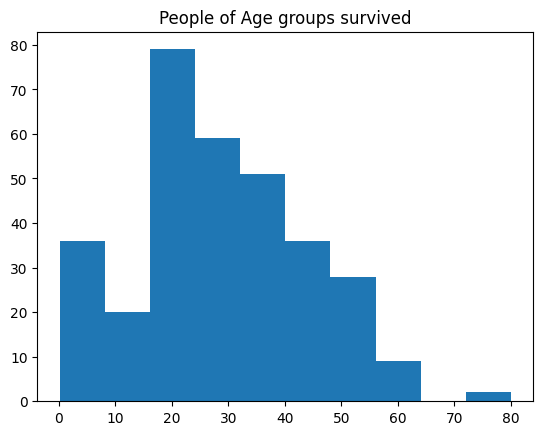

In [56]:
plt.figure()
age = td.loc[td.survived == 1,'age']
plt.title('People of Age groups survived')
plt.hist(age)
plt.show()

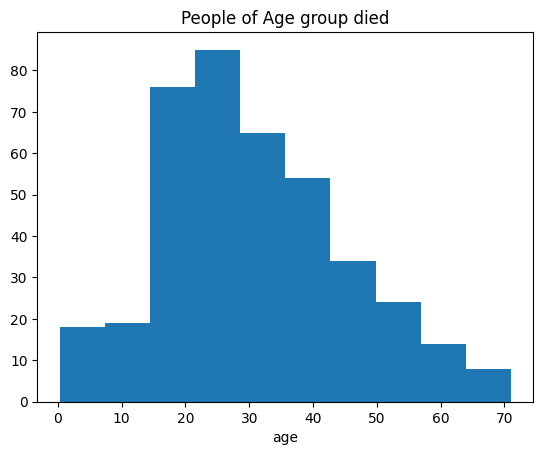

In [57]:
plt.figure()
age = td.loc[td.survived == 0, 'age']
plt.title('People of Age group died')
plt.xlabel('age')
plt.hist(age)
plt.show()

<Axes: xlabel='survived', ylabel='count'>

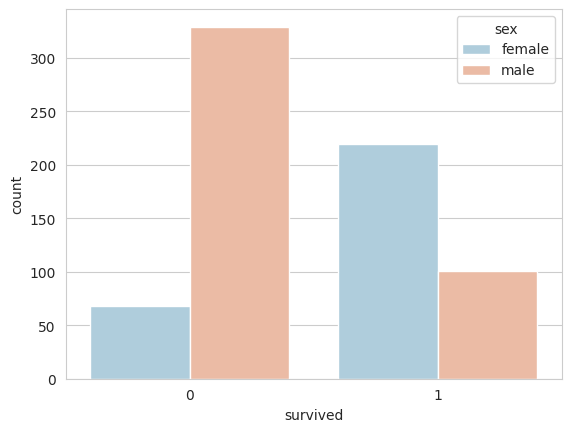

In [97]:
sns.set_style('whitegrid')
sns.countplot(x=td["survived"],hue=td['sex'],palette='RdBu_r')


In [58]:
dead = len(td[td['survived'] == 0])
survived = len(td[td['survived'] == 1])
print("The no. of people dead is ",dead)
print("The no. of people survived is ",survived)

The no. of people dead is  397
The no. of people survived is  320


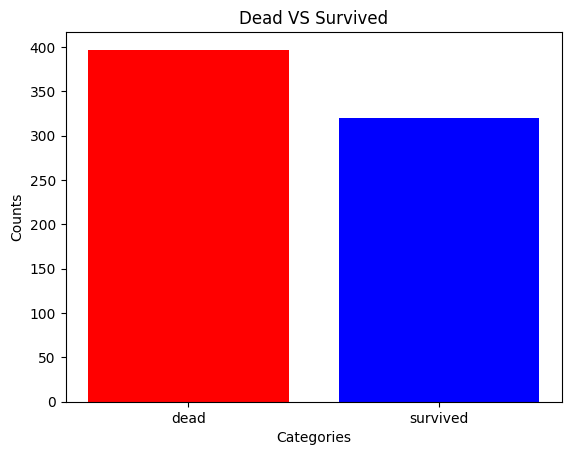

In [59]:
categories = ['dead','survived']
counts = [397,320]
plt.bar(categories,counts,color=['red','blue'])
plt.xlabel("Categories")
plt.ylabel("Counts")
plt.title("Dead VS Survived")
plt.show()

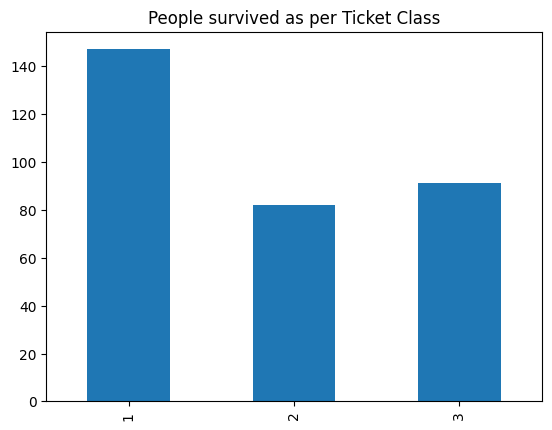

In [60]:
plt.figure()
td.loc[td['survived'] == 1,'pclass'].value_counts().sort_index().plot.bar()
plt.title('People survived as per Ticket Class')
plt.show()


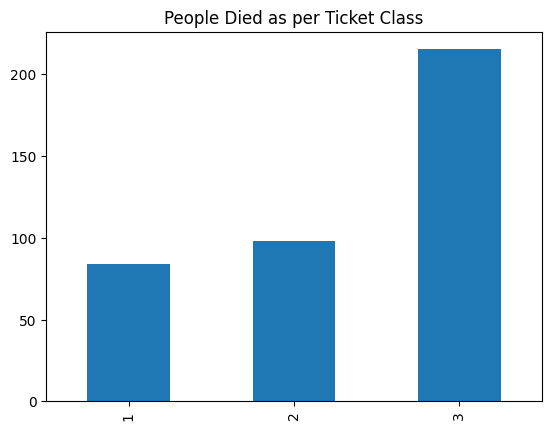

In [61]:
plt.figure()
td.loc[td['survived'] == 0,'pclass'].value_counts().sort_index().plot.bar()
plt.title('People Died as per Ticket Class')
plt.show()

<Axes: >

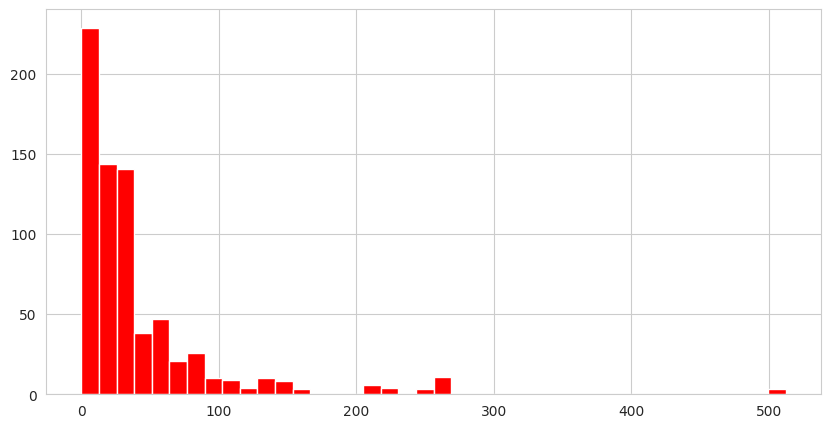

In [92]:
td['fare'].hist(color='red',bins=40,figsize=(10,5))

<Axes: xlabel='pclass', ylabel='age'>

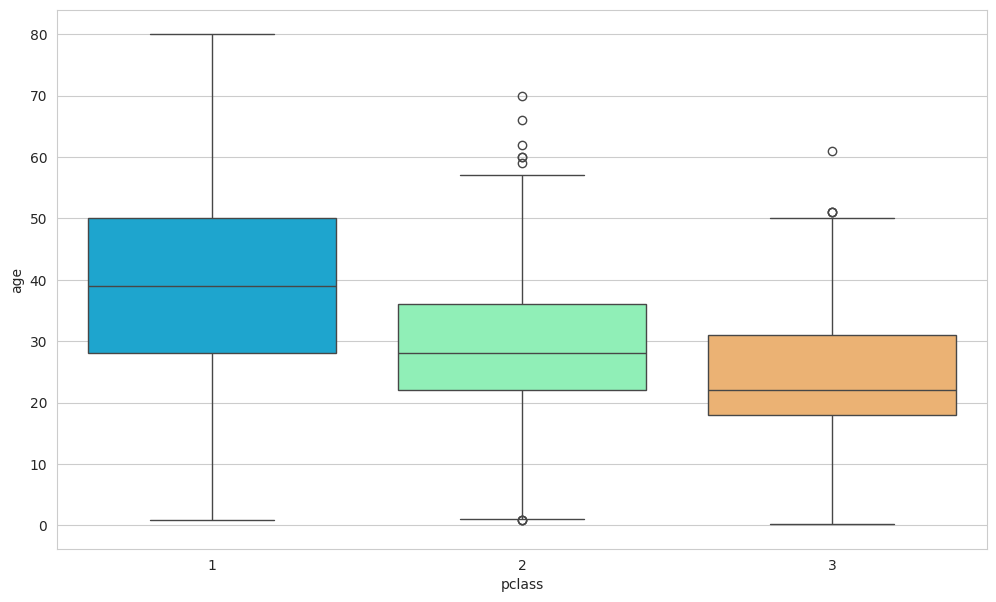

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
sns.boxplot(x=td['pclass'],y=td['age'],palette='rainbow')


In [105]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):

        if pclass == 1:
            return 37

        elif pclass == 2:
            return 29

        else:
            return 24

    else:
        return age


In [106]:
td['age'] = td[['age','pclass']].apply(impute_age,axis=1)

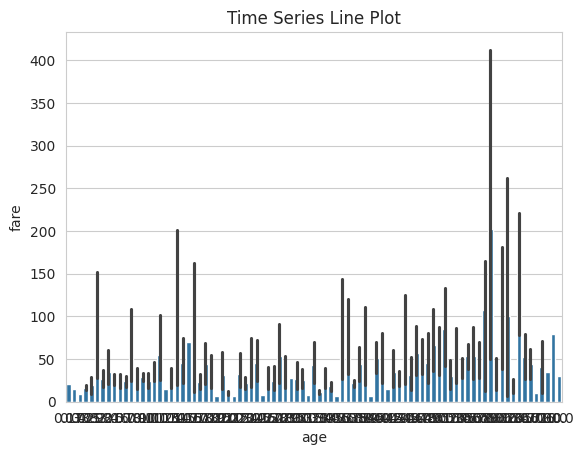

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=td['age'], y=td['fare'])
plt.title('Time Series Line Plot')
plt.show()

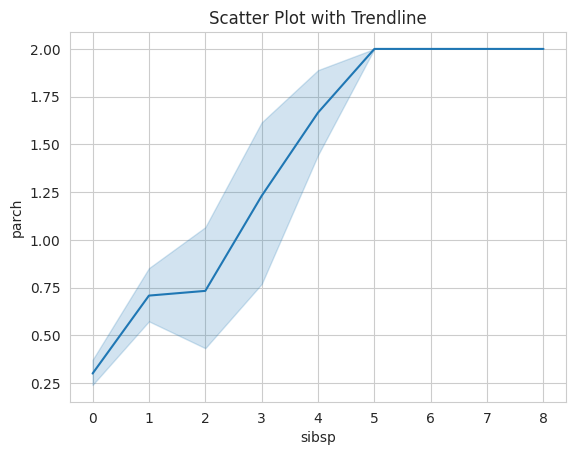

In [109]:
sns.lineplot(x=td['sibsp'], y=td['parch'])
plt.title('Scatter Plot with Trendline')
plt.show()


Training Dataset

In [62]:
td.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'embarked', 'Last Name', 'First Name'],
      dtype='object')

In [63]:
predict = 'survived'
features=['pclass','survived','age','sibsp','parch','fare']
x=np.array(td[features].drop(columns=[predict]))
y=np.array(td[predict])
x.shape,y.shape

((717, 5), (717,))

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7)

In [65]:
x_train.shape,x_test.shape

((215, 5), (502, 5))

In [66]:
y_train.shape,y_test.shape

((215,), (502,))

Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [69]:
model.fit(x_train,y_train)

LogisticRegression()

In [71]:
predictions = model.predict(x_test)
model.score(x_test,predictions)*100

100.0

In [72]:
from sklearn.metrics import accuracy_score
print("Accurarcy is ",accuracy_score(y_test,predictions))

Accurarcy is  0.6593625498007968


In [73]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error ",mean_absolute_error(y_test,predictions))

Mean Absolute Error  0.34063745019920316


Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [76]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
predictions = model.predict(x_test)
model.score(x_test,predictions)*100

100.0

In [78]:
from sklearn.metrics import accuracy_score
print("Accuracy is ",accuracy_score(y_test,predictions))

Accuracy is  0.5976095617529881


In [79]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error is ",mean_absolute_error(y_test,predictions))

Mean Absolute Error is  0.40239043824701193


In [83]:
td['age'].mean()

29.952928870292887

In [84]:
import pandas as pd
datadict = pd.DataFrame(td.dtypes)
datadict

,0
pclass,int64
survived,int64
sex,object
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
embarked,object
Last Name,object


In [86]:
datadict['Count']=td.count()
datadict


,0,Count
pclass,int64,717
survived,int64,717
sex,object,717
age,float64,717
sibsp,int64,717
parch,int64,717
ticket,object,717
fare,float64,717
embarked,object,717
Last Name,object,717
